# Assignment-07 Clustering-(Crime data)

# Problem Statement
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Draw the inferences from the clusters obtained.

In [103]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [111]:
c = pd.read_csv("crime_data.csv")
c.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
crime=c.rename({'Unnamed: 0':'States'},axis=1)
crime.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
#crime.States.value_counts()
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.isna().sum() 

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [39]:
x = c.drop(columns=['Unnamed: 0'])
x

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


# Hierarchical (Crime)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [13]:
x= sc.fit_transform(x)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [15]:
x = sc.fit_transform(x)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [16]:
from scipy.cluster import hierarchy

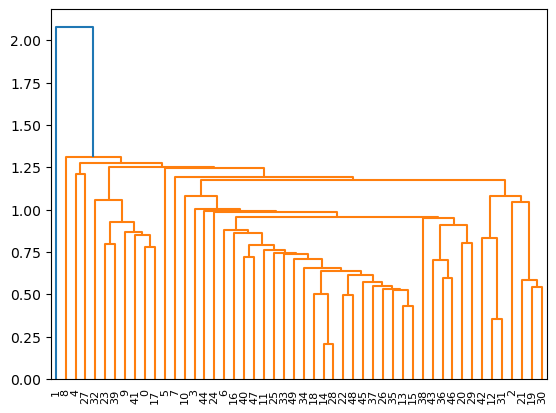

In [17]:
lk = hierarchy.linkage(x)
dendrogram = hierarchy.dendrogram(lk)

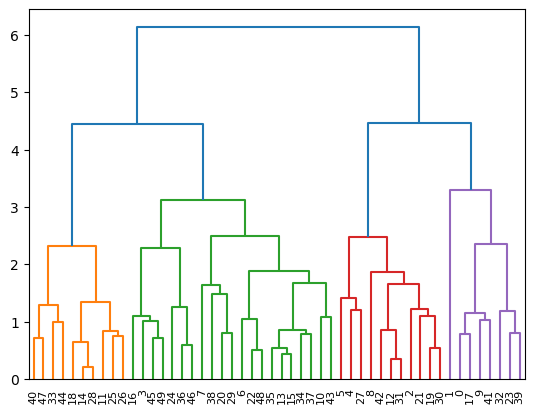

In [18]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [129]:
y

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [130]:
c['Cluster'] = y

In [126]:
c

,Murder,Assault,UrbanPop,Rape,Y,Cluster
0,13.2,236,58,21.2,2,1
1,10.0,263,48,44.5,3,1
2,8.1,294,80,31.0,3,1
3,8.8,190,50,19.5,1,2
4,9.0,276,91,40.6,3,1
5,7.9,204,78,38.7,3,2
6,3.3,110,77,11.1,0,0
7,5.9,238,72,15.8,0,1
8,15.4,335,80,31.9,3,1
9,17.4,211,60,25.8,2,2


In [131]:
c.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape,Y
Cluster,,,,,
0,11.812500,272.562500,68.312500,28.375000,2.500000
1,2.950000,62.700000,53.900000,11.510000,3.600000
2,8.214286,173.285714,70.642857,22.842857,1.285714
3,5.590000,112.400000,65.600000,17.270000,0.900000


In [115]:
c[c['Cluster']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,2
9,Georgia,17.4,211,60,25.8,2
17,Louisiana,15.4,249,66,22.2,2
23,Mississippi,16.1,259,44,17.1,2
32,North Carolina,13.0,337,45,16.1,2
39,South Carolina,14.4,279,48,22.5,2
41,Tennessee,13.2,188,59,26.9,2


In [116]:
c[c['Cluster']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
3,Arkansas,8.8,190,50,19.5,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
25,Montana,6.0,109,53,16.4,1
26,Nebraska,4.3,102,62,16.5,1
35,Oklahoma,6.6,151,68,20.0,1
36,Oregon,4.9,159,67,29.3,1
45,Virginia,8.5,156,63,20.7,1
49,Wyoming,6.8,161,60,15.6,1


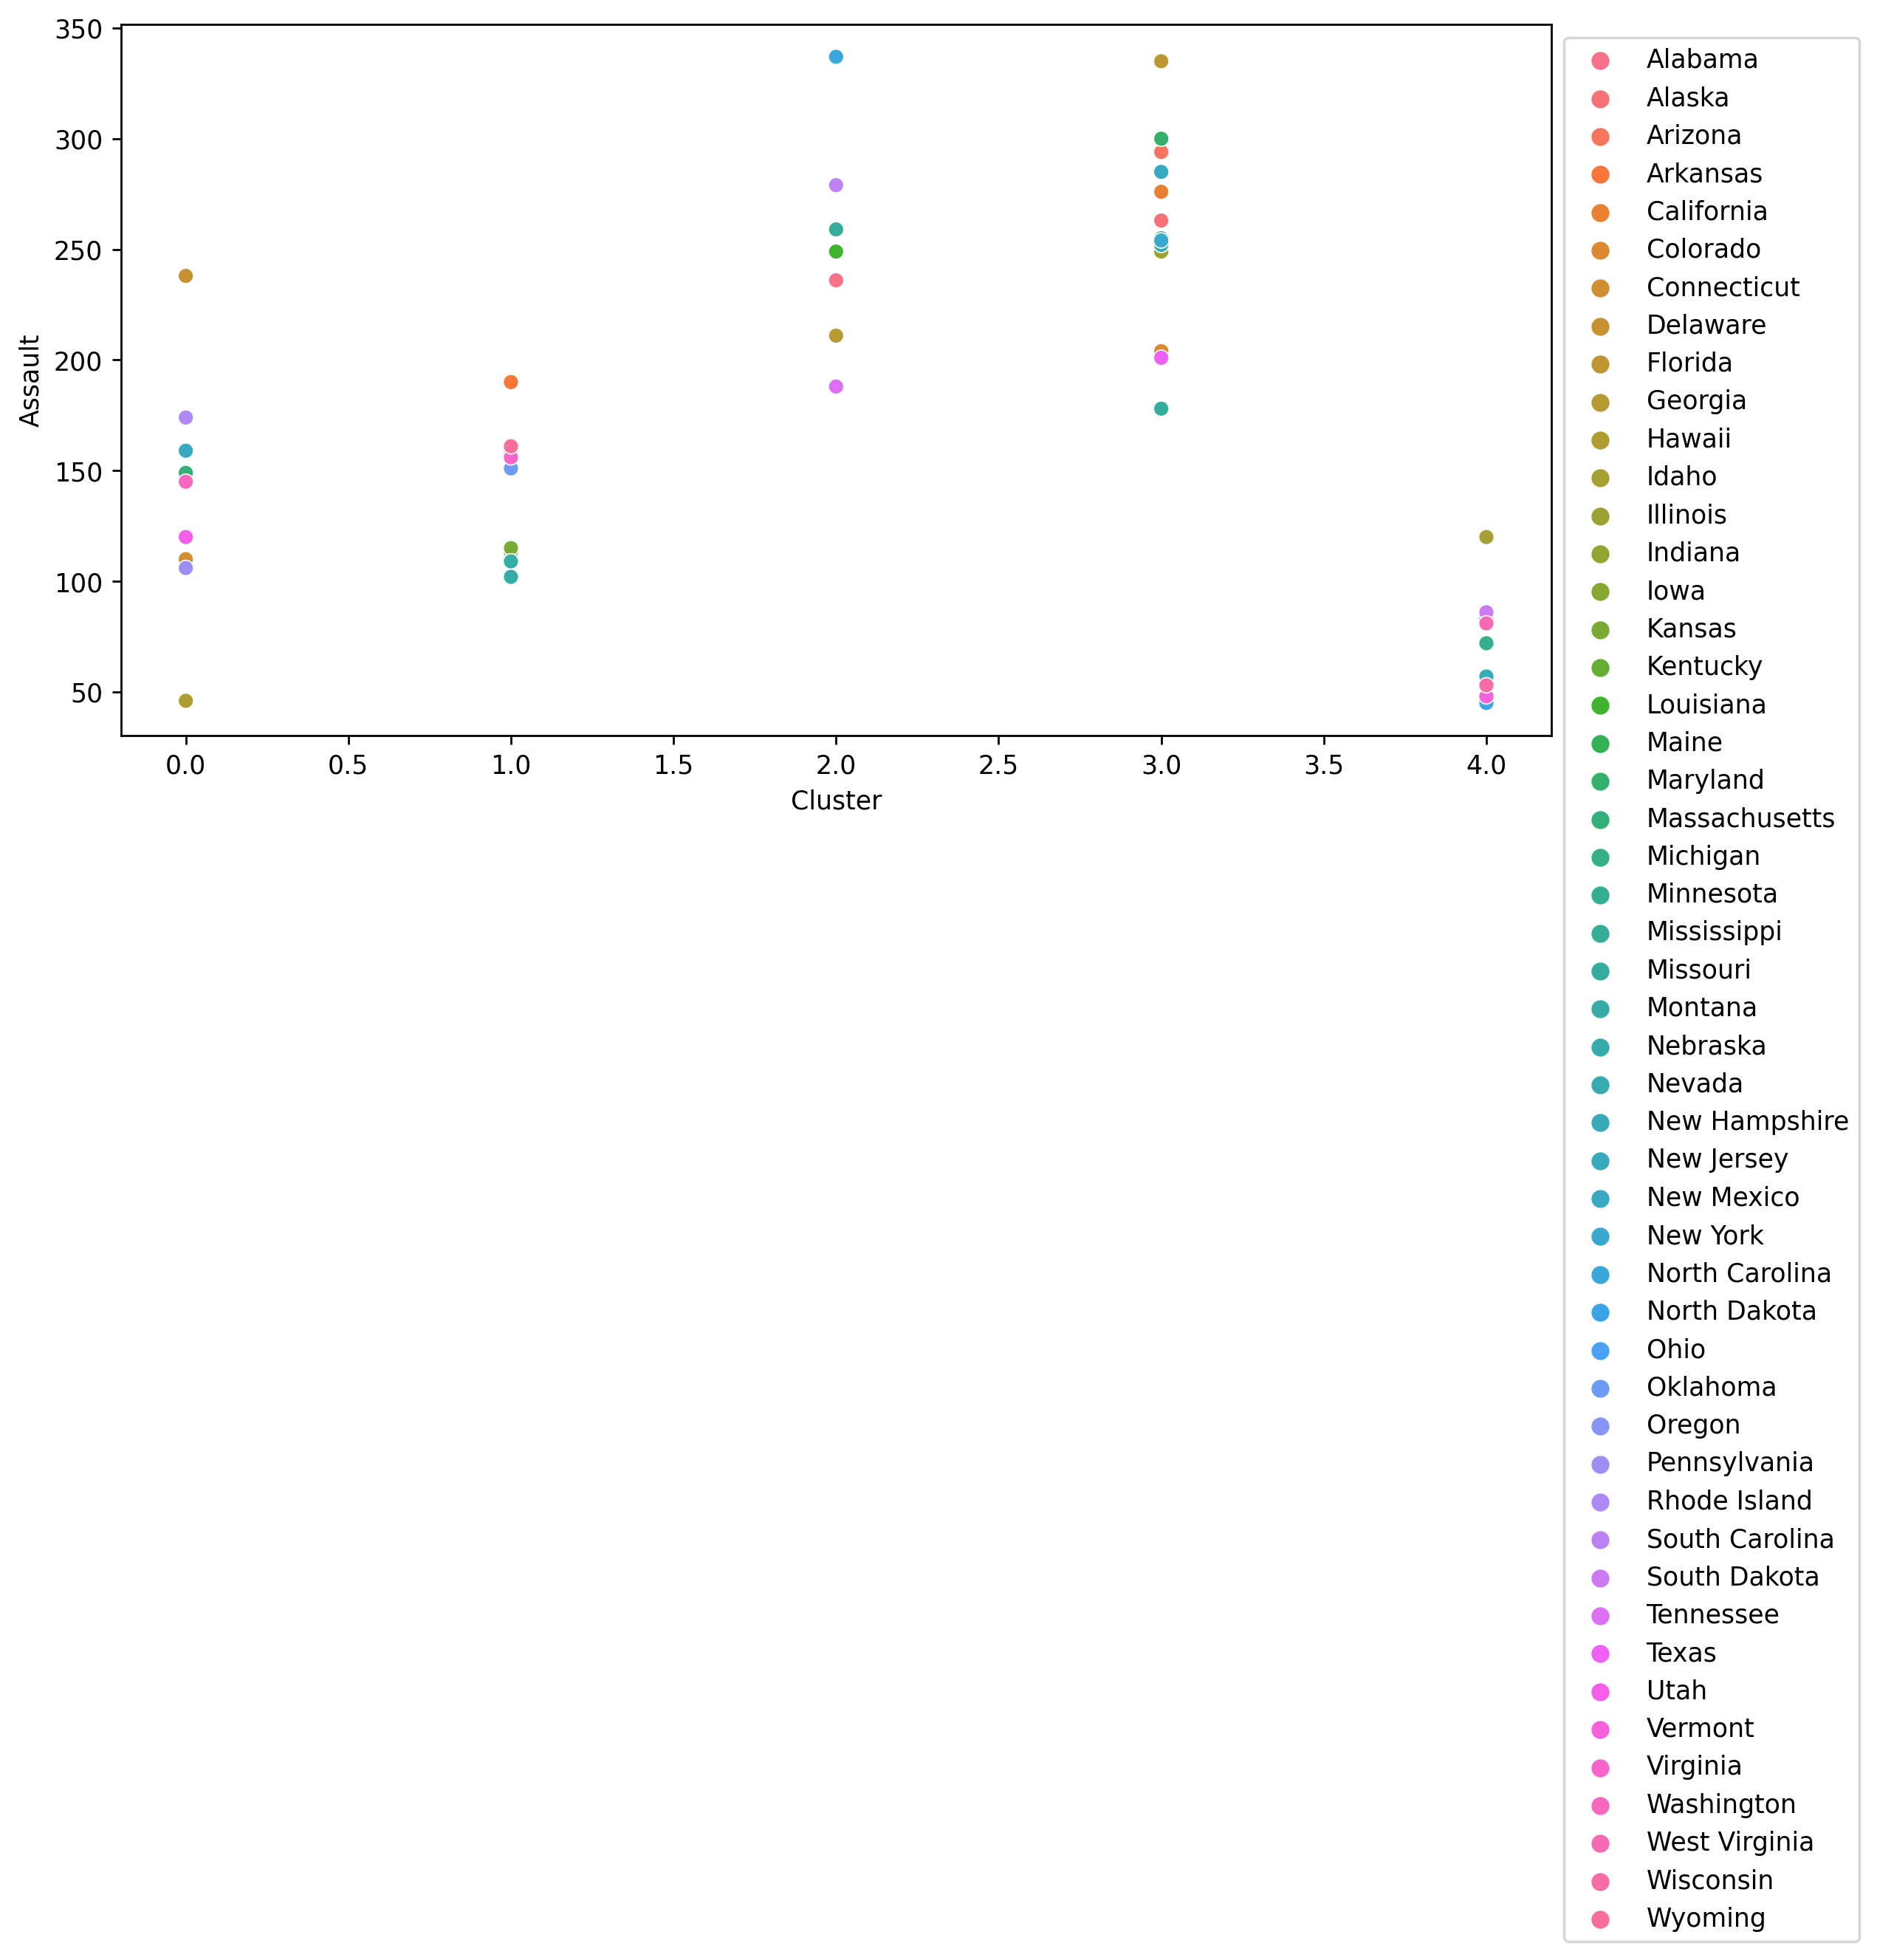

In [117]:
import seaborn as sns

sns.scatterplot(c['Cluster'],c['Assault'],hue=c['Unnamed: 0'])
plt.legend(bbox_to_anchor = (1,1))

# DB_Scan Clustering

In [34]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

<AxesSubplot:>

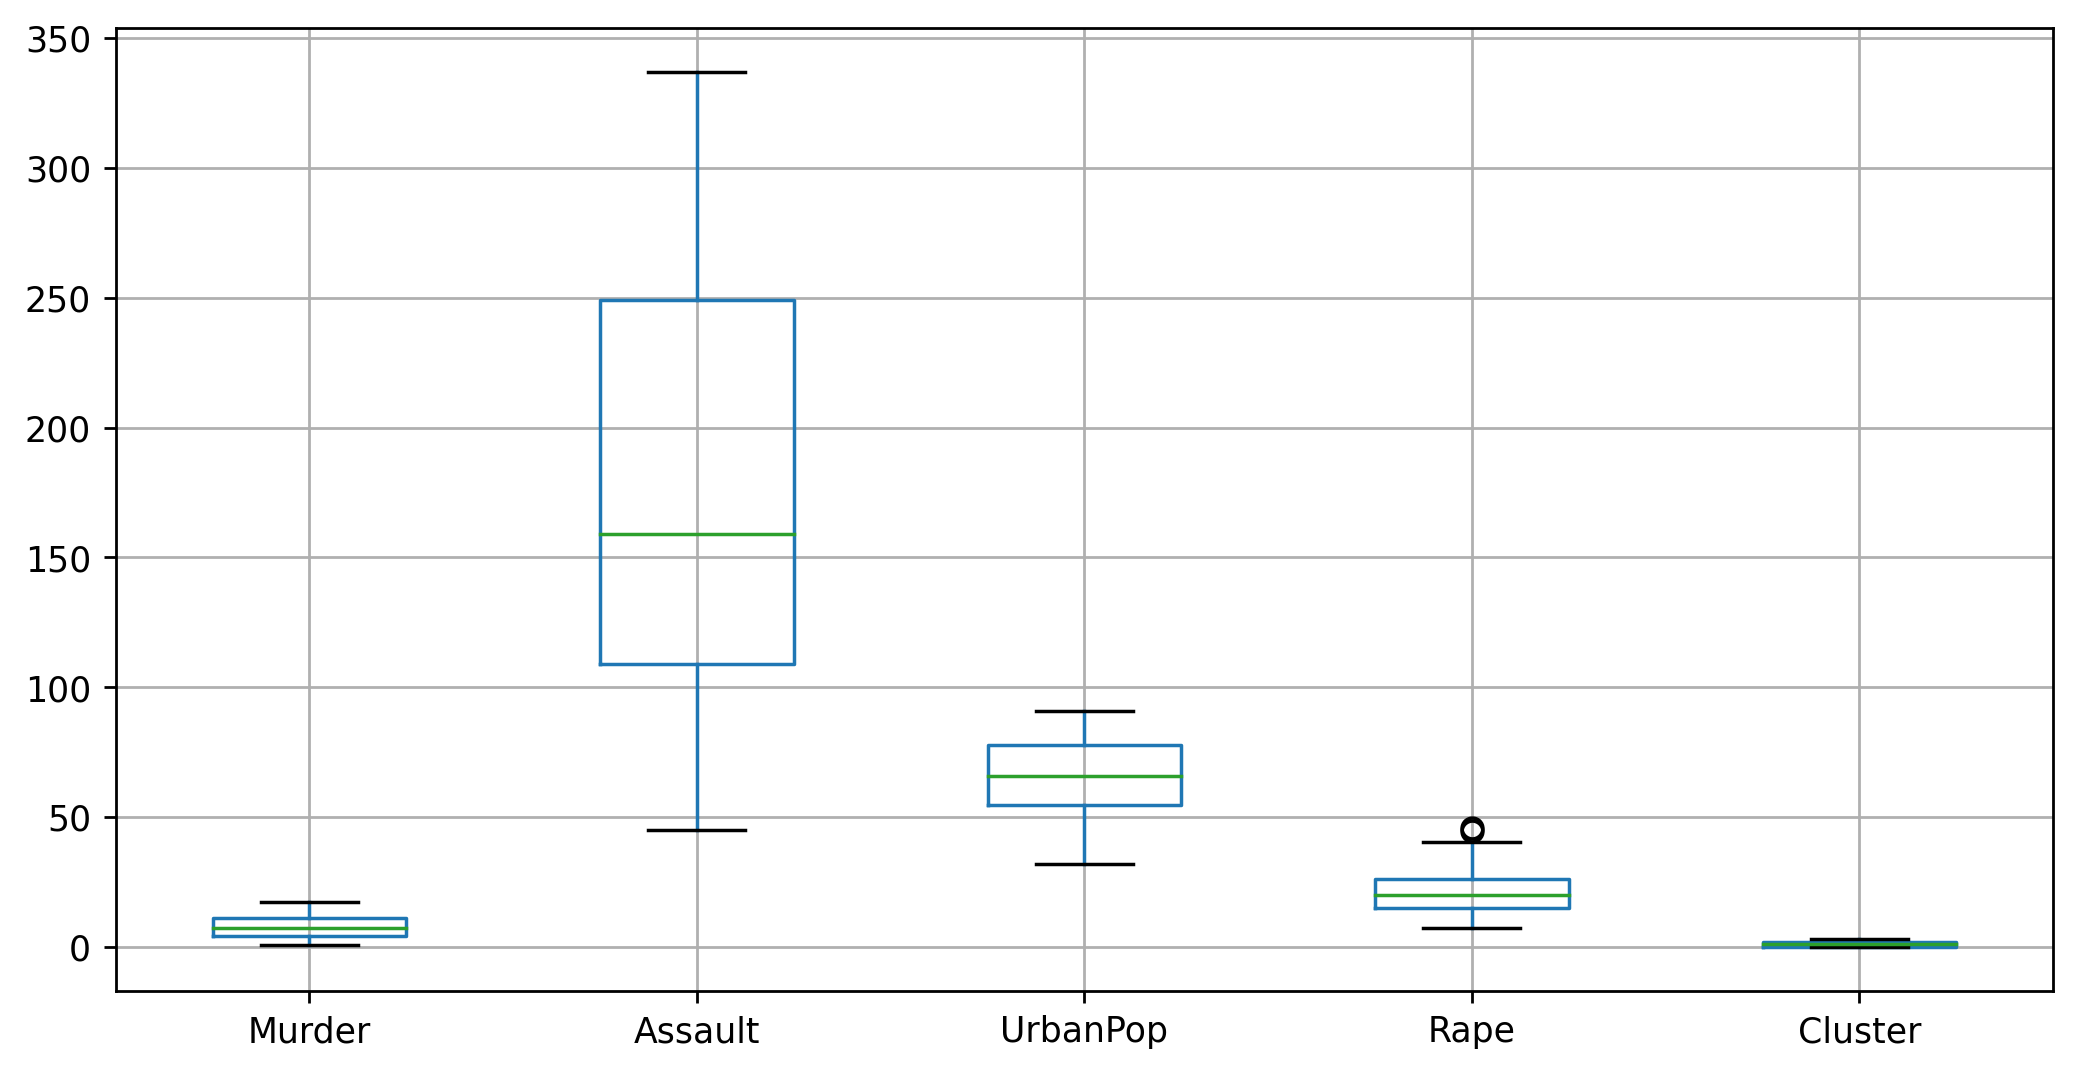

In [35]:
c.boxplot()

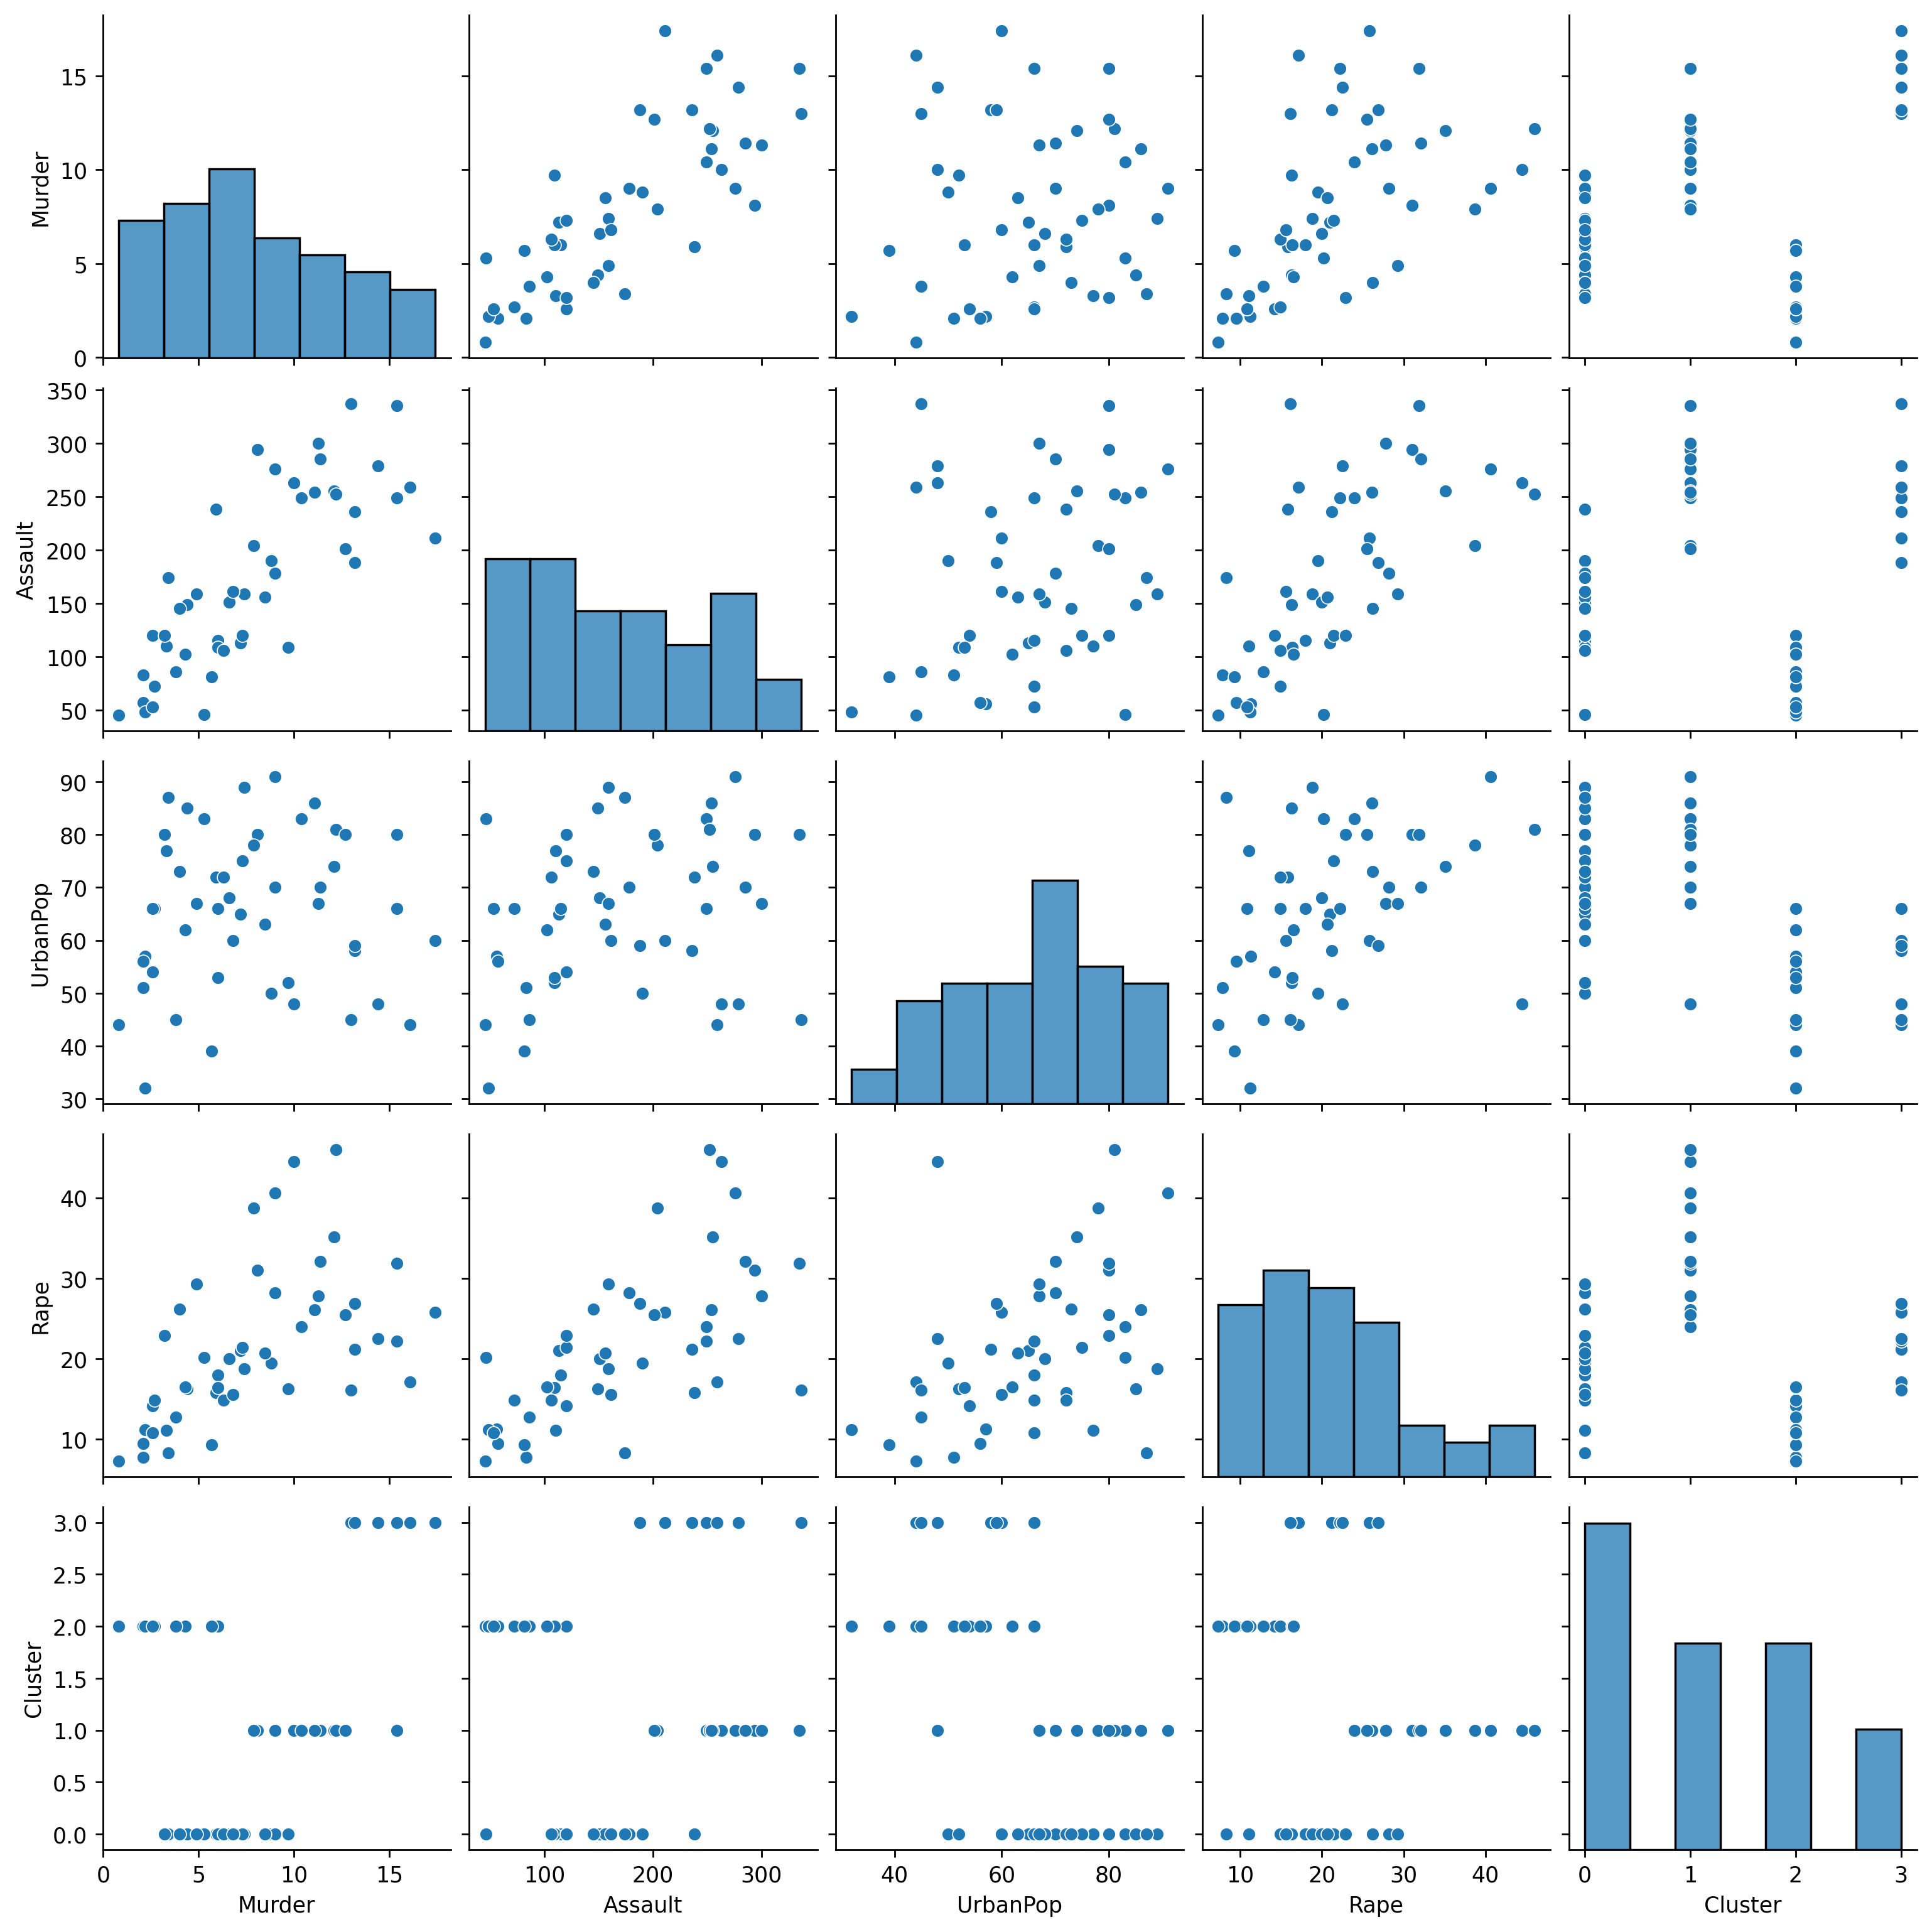

In [36]:
import seaborn as sns

sns.pairplot(c)

In [147]:
sc = StandardScaler()

x = sc.fit_transform(c)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.65720771,
        -1.20661485, -0.66601018],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -0.63423999,
        -1.20661485, -0.66601018],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.63423999,
        -1.20661485, -0.66601018],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -1.65720771,
         0.56781875, -0.66601018],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.63423999,
        -1.20661485, -0.66601018],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.63423999,
         0.56781875, -0.66601018],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  0.38872773,
         1.45503555,  0.61477862],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.38872773,
        -1.20661485, -0.66601018],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.63423999,
        -1.20661485, -0.66601018],
       [ 2.22926518,  0.4877

In [148]:
from sklearn.cluster import DBSCAN

In [149]:
db = DBSCAN()
db.fit(x)

DBSCAN()

In [153]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [154]:
from sklearn.metrics import silhouette_score

In [173]:
db  =DBSCAN(eps=2, min_samples=5)

db.fit_predict(x)

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,  1,  0],
      dtype=int64)

In [174]:
silhouette_score(x,db.labels_)

0.1701749187672417

In [175]:
c['Y'] = db.labels_

In [176]:
c

,Murder,Assault,UrbanPop,Rape,Y,Cluster,clusters
0,13.2,236,58,21.2,0,0,-1
1,10.0,263,48,44.5,-1,0,-1
2,8.1,294,80,31.0,0,0,-1
3,8.8,190,50,19.5,0,2,-1
4,9.0,276,91,40.6,0,0,-1
5,7.9,204,78,38.7,0,2,-1
6,3.3,110,77,11.1,0,3,0
7,5.9,238,72,15.8,0,0,-1
8,15.4,335,80,31.9,0,0,-1
9,17.4,211,60,25.8,0,2,-1


In [177]:
c[c['Y']==-1]

,Murder,Assault,UrbanPop,Rape,Y,Cluster,clusters
1,10.0,263,48,44.5,-1,0,-1


In [178]:
c.groupby('Y').agg('mean')

,Murder,Assault,UrbanPop,Rape,Cluster,clusters
Y,,,,,,
-1,10.000000,263.000000,48.000000,44.500000,0.000,-1.0
0,8.880000,192.350000,69.325000,23.055000,1.475,-0.8
1,2.688889,64.555556,50.666667,10.544444,1.000,1.0


# K-Means Clustering

In [118]:
c = c[['Murder','Assault','UrbanPop','Rape']]

In [119]:
c

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [64]:
c.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

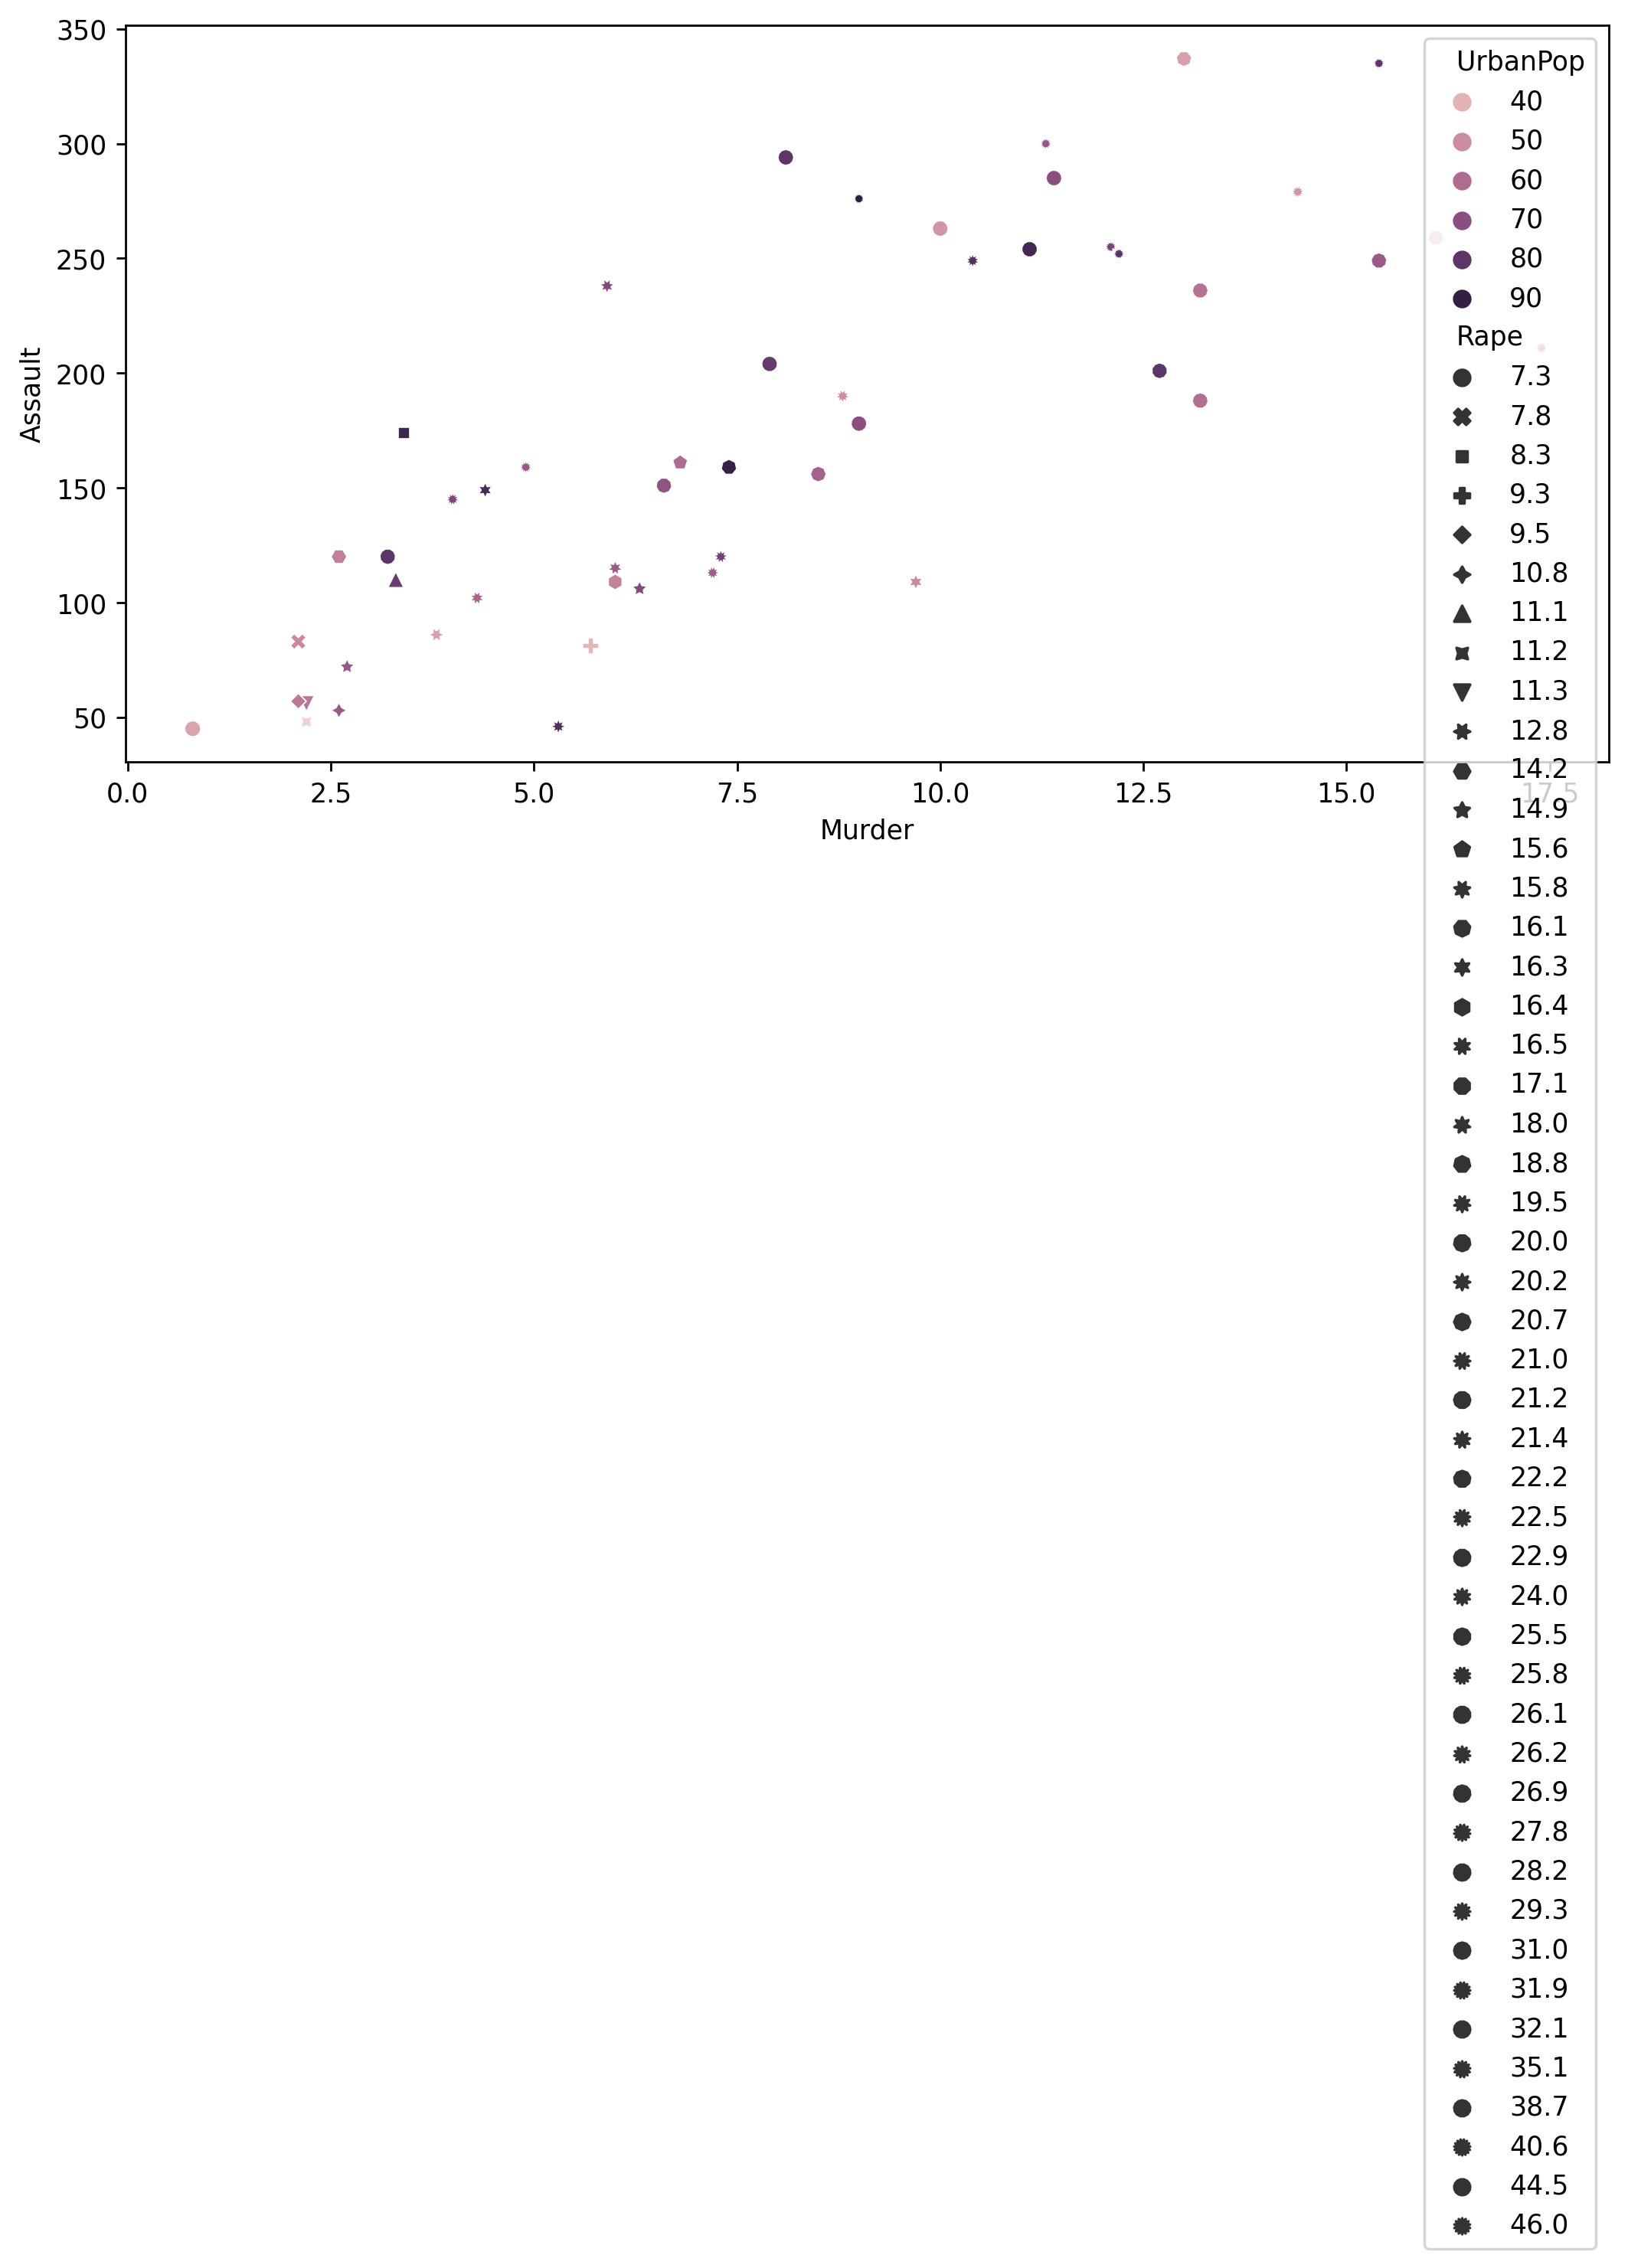

In [120]:
sns.scatterplot(c['Murder'], c['Assault'],c['UrbanPop'],c['Rape'])

In [68]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(c)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [69]:
from sklearn.cluster import KMeans

In [70]:
km = KMeans()
y = km.fit_predict(x)

In [71]:
km.cluster_centers_

array([[-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [ 0.87540173,  1.22260495,  0.83465436,  0.85799046],
       [-0.15492604, -0.44315111, -0.70764174, -0.47151459],
       [ 0.44344101,  0.88775677,  1.2417461 ,  2.21463743],
       [-0.76257011, -0.53850456,  1.25337729, -0.53550482],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-0.28248491, -0.27466642,  0.24844227,  0.03429589],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392]])

In [72]:
x = pd.DataFrame(x)
x['Cluster'] = y
x

,0,1,2,3,Cluster
0,1.255179,0.790787,-0.526195,-0.003451,5
1,0.513019,1.118060,-1.224067,2.509424,7
2,0.072361,1.493817,1.009122,1.053466,1
3,0.234708,0.233212,-1.084492,-0.186794,2
4,0.281093,1.275635,1.776781,2.088814,3
5,0.025976,0.402909,0.869548,1.883901,3
6,-1.040880,-0.736484,0.799761,-1.092723,4
7,-0.437875,0.815030,0.450825,-0.585834,6
8,1.765415,1.990786,1.009122,1.150530,1
9,2.229265,0.487757,-0.386621,0.492653,5


In [73]:
km.cluster_centers_

array([[-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [ 0.87540173,  1.22260495,  0.83465436,  0.85799046],
       [-0.15492604, -0.44315111, -0.70764174, -0.47151459],
       [ 0.44344101,  0.88775677,  1.2417461 ,  2.21463743],
       [-0.76257011, -0.53850456,  1.25337729, -0.53550482],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-0.28248491, -0.27466642,  0.24844227,  0.03429589],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392]])

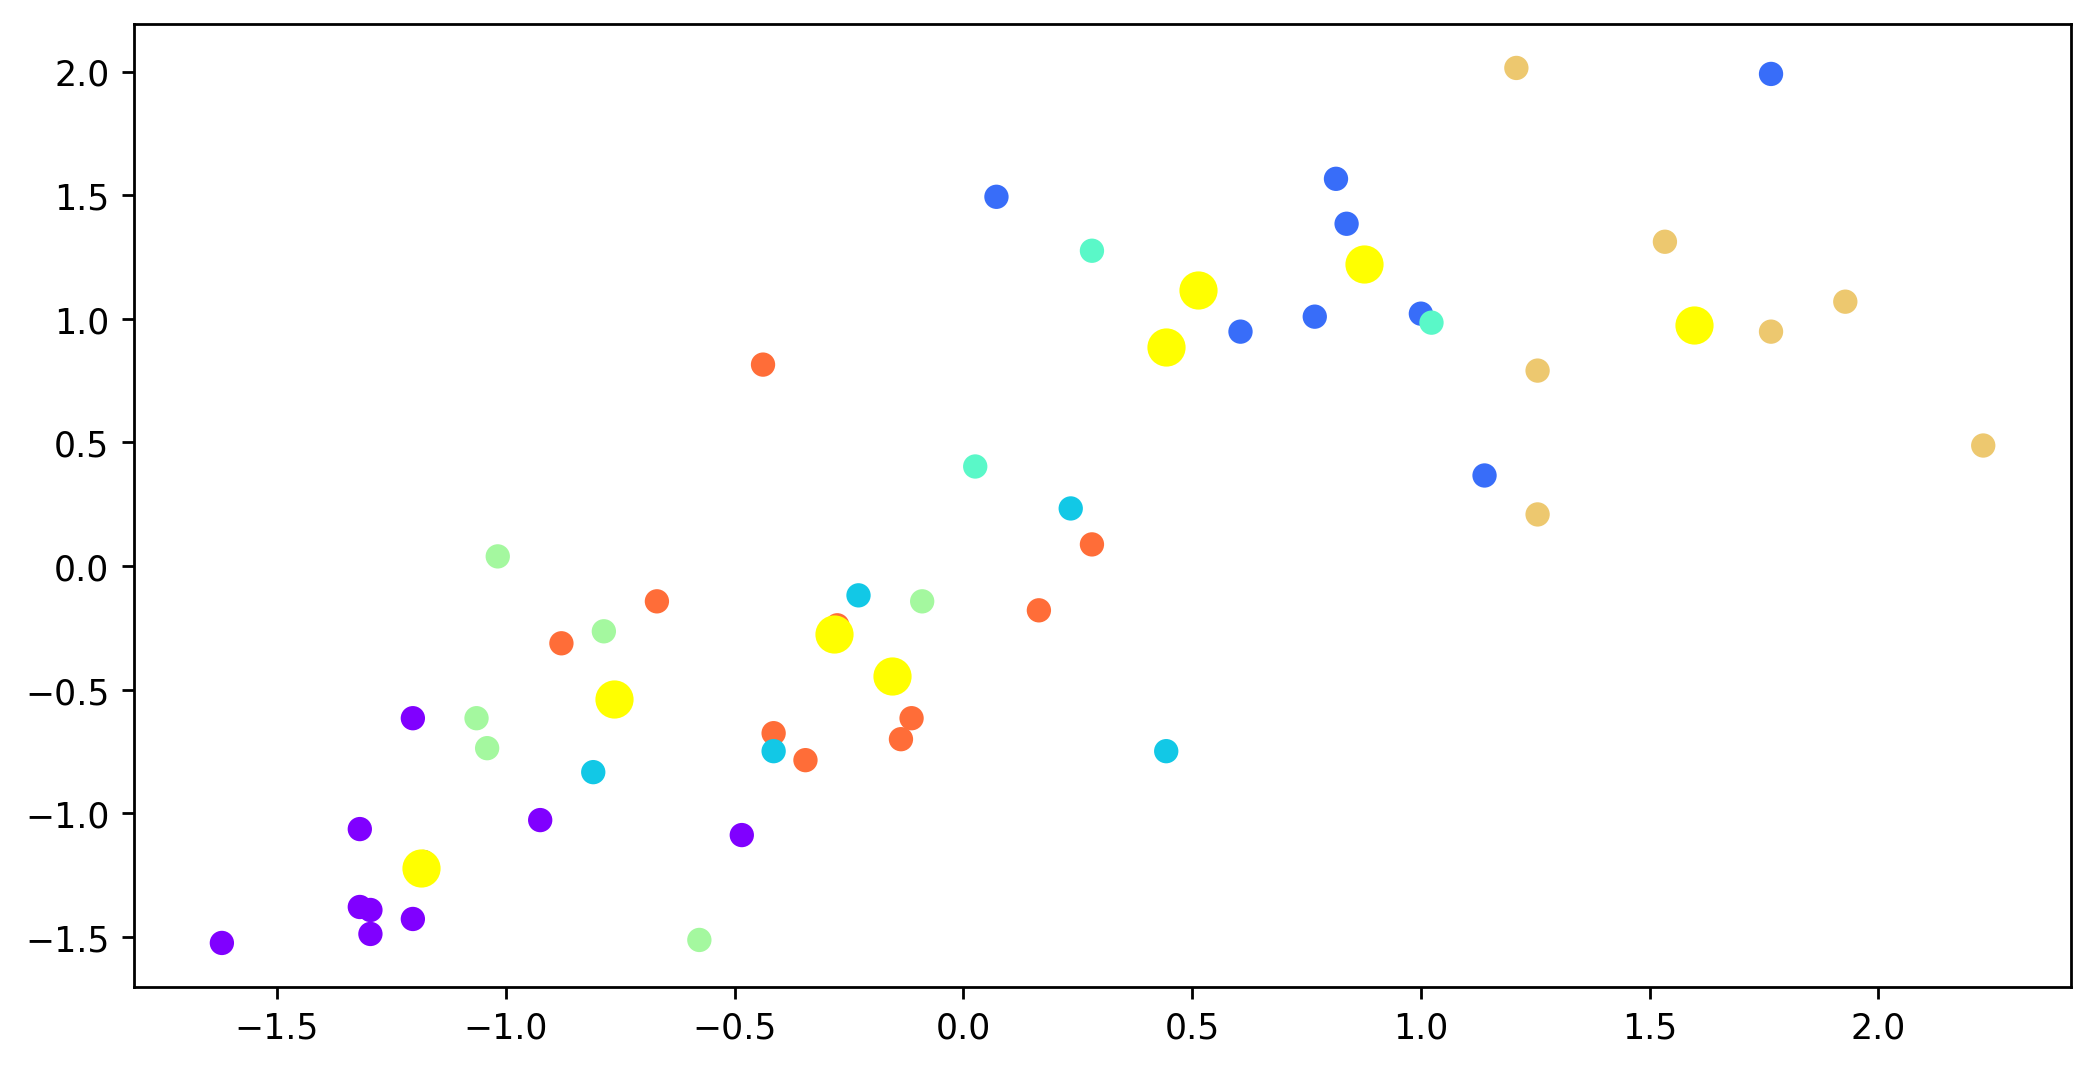

In [74]:
plt.scatter(x.iloc[:,0],x.iloc[:,1], c = x['Cluster'], cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 100)

In [76]:
x1 = x.iloc[:,:-1]
x1

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


# Elbow Graph

In [121]:
wcss = []

for i in range(1,25):
    km = KMeans(n_clusters=i)
    km.fit_predict(x1)
    wcss.append(km.inertia_)

In [79]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.05119672966492,
 44.609030666687055,
 40.684217523997035,
 37.61818296836985,
 31.12700043325762,
 28.22532667693629,
 24.79755409754057,
 22.106280400238887,
 21.326205025500055,
 19.4440054755249,
 18.890068652318895,
 17.288788944222794,
 16.420084500195166,
 14.586361966559593,
 13.579536325174976,
 13.117374301220142,
 12.072764263163688,
 11.320751594172533,
 10.58502177931741,
 9.922568128962746]

Text(0, 0.5, 'WCSS')

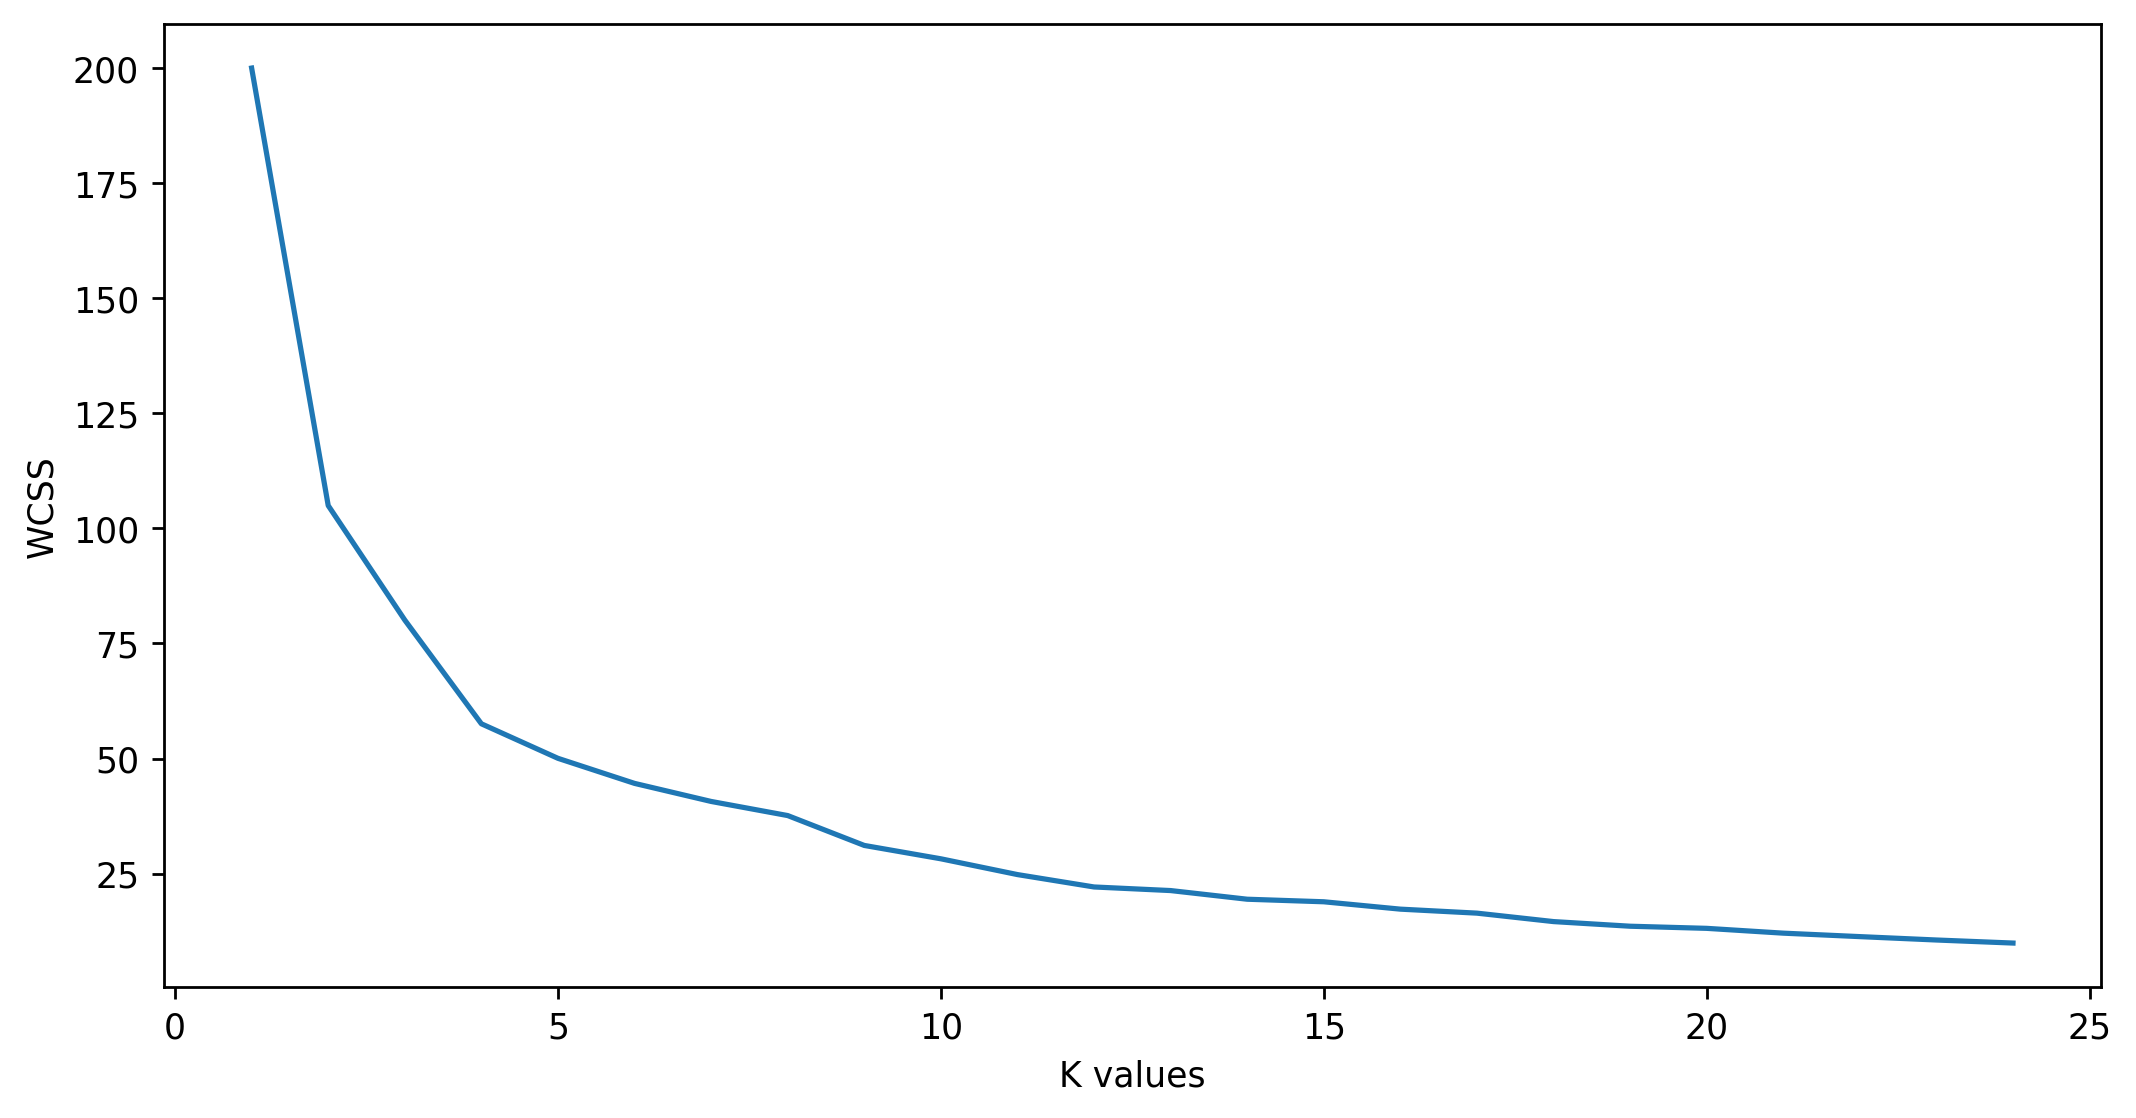

In [80]:
plt.plot(range(1,25), wcss)
plt.xlabel('K values')
plt.ylabel('WCSS')

In [141]:
km = KMeans(n_clusters=4)
y = km.fit_predict(x1)
y

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 3, 1, 2, 3, 2, 2, 0, 3, 1, 2, 1,
       3, 0, 1, 2, 2, 1, 3, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 1, 2,
       3, 2, 2, 3, 3, 2])

In [142]:
x1['Cluster'] = y

x1

,0,1,2,3,Cluster
0,1.255179,0.790787,-0.526195,-0.003451,0
1,0.513019,1.118060,-1.224067,2.509424,1
2,0.072361,1.493817,1.009122,1.053466,1
3,0.234708,0.233212,-1.084492,-0.186794,0
4,0.281093,1.275635,1.776781,2.088814,1
5,0.025976,0.402909,0.869548,1.883901,1
6,-1.040880,-0.736484,0.799761,-1.092723,2
7,-0.437875,0.815030,0.450825,-0.585834,2
8,1.765415,1.990786,1.009122,1.150530,1
9,2.229265,0.487757,-0.386621,0.492653,0


In [143]:
km.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669,  1.875     ],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383,  3.        ],
       [-0.45740535, -0.44812718,  0.38103786, -0.30485994,  0.47368421],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445,  4.        ]])

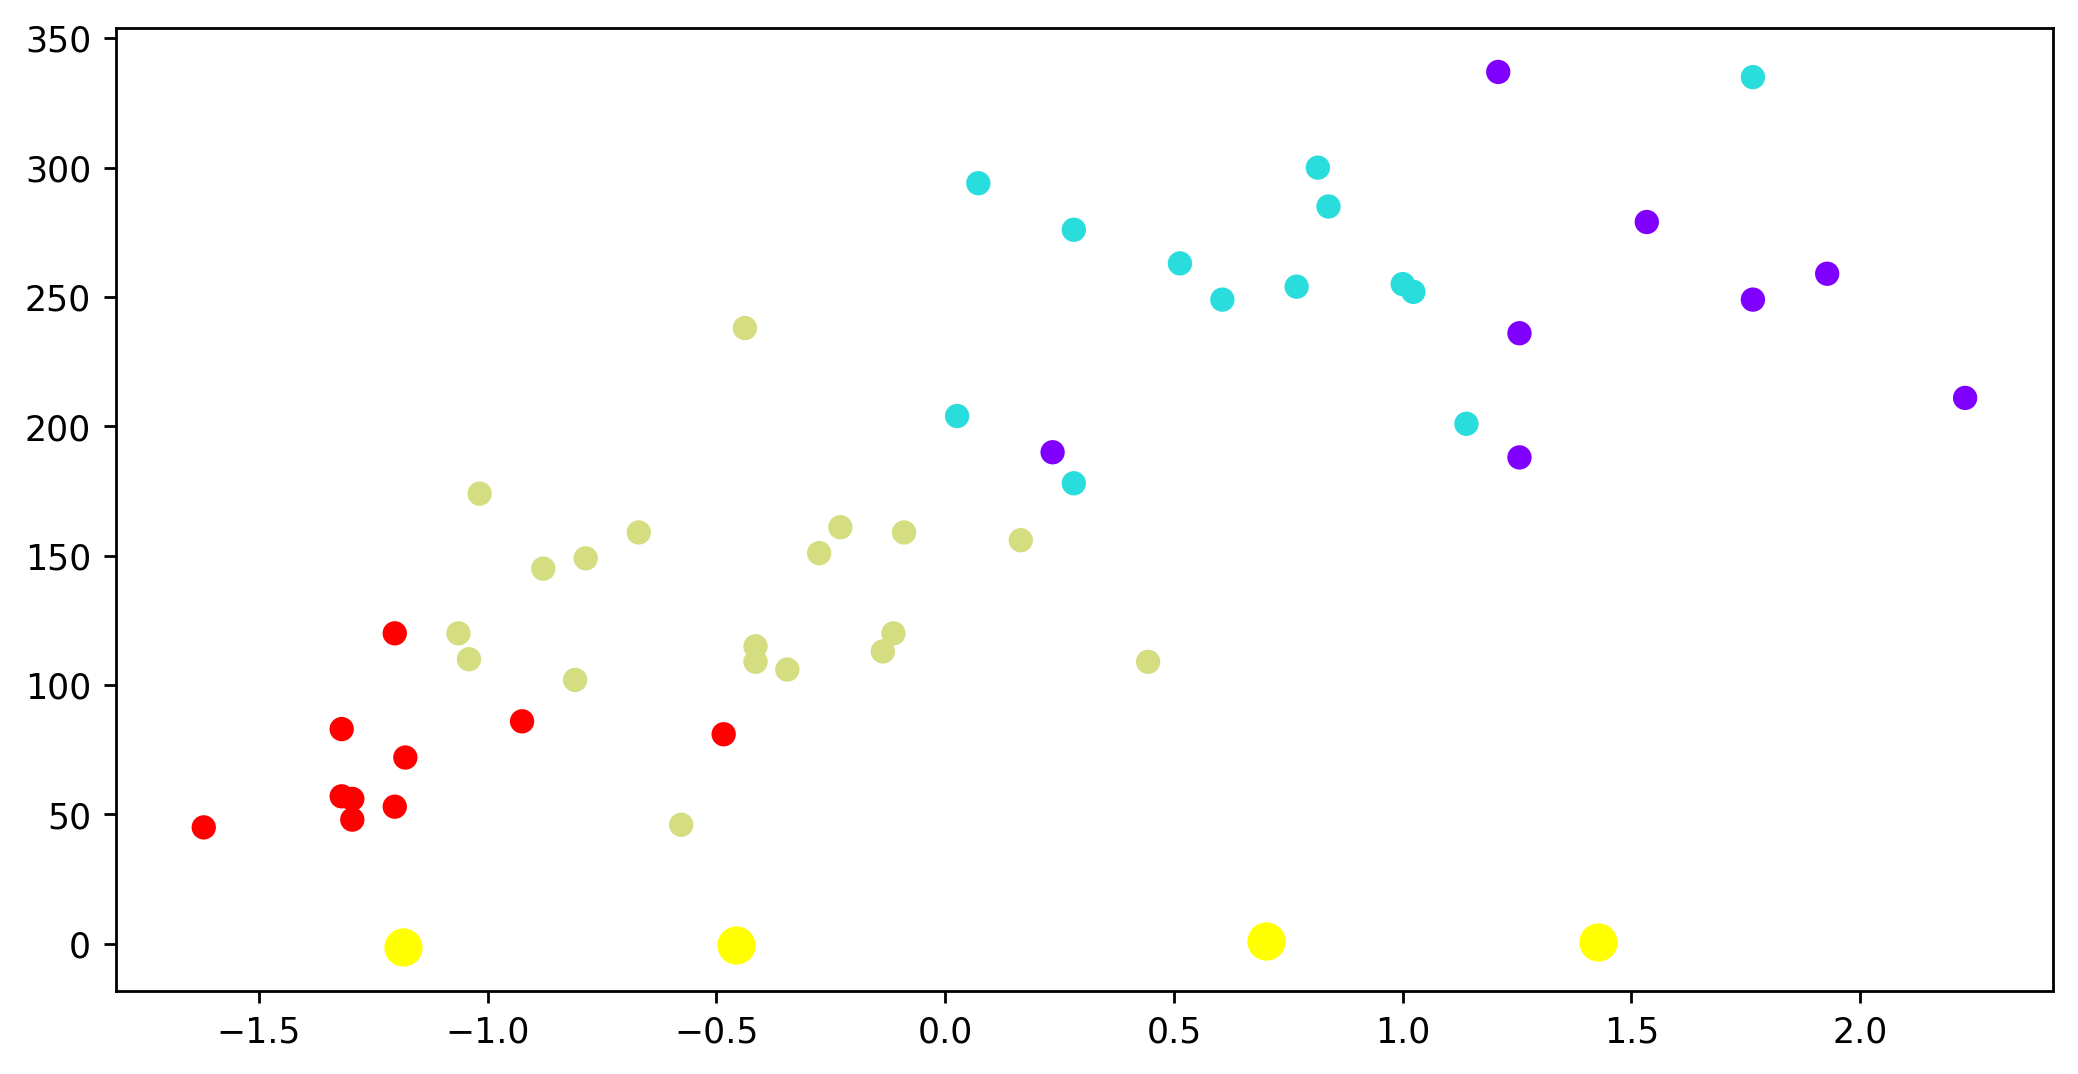

In [144]:
plt.scatter(x1.iloc[:,0], x.iloc[:,1], c = x1['Cluster'], cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 100)

In [145]:
c['Y'] = y
c

,Murder,Assault,UrbanPop,Rape,Y,Cluster,clusters
0,13.2,236,58,21.2,0,0,-1
1,10.0,263,48,44.5,1,0,-1
2,8.1,294,80,31.0,1,0,-1
3,8.8,190,50,19.5,0,2,-1
4,9.0,276,91,40.6,1,0,-1
5,7.9,204,78,38.7,1,2,-1
6,3.3,110,77,11.1,2,3,0
7,5.9,238,72,15.8,2,0,-1
8,15.4,335,80,31.9,1,0,-1
9,17.4,211,60,25.8,0,2,-1


In [146]:
c.groupby('Y').agg('mean')

,Murder,Assault,UrbanPop,Rape,Cluster,clusters
Y,,,,,,
0,13.937500,243.625000,53.75,21.412500,0.750000,-1.000000
1,10.815385,257.384615,76.00,33.192308,0.461538,-1.000000
2,5.815789,133.789474,71.00,18.405263,2.315789,-0.578947
3,2.680000,70.100000,51.00,10.910000,1.200000,0.800000
